<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [140]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem
import scipy.stats


%matplotlib inline

from scipy.stats import bernoulli, beta               

import pylab as plt

In [7]:
# datos
datos=pd.read_csv('data/cookie_cats.csv')
datos.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [116]:
gate_30, gate_40=datos[datos['version']=='gate_30'], datos[datos['version']=='gate_40']

gate_40

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


In [3]:
# muestreo


In [117]:
# testeo para retention_1
CR_ctrl=len(gate_30[gate_30['retention_1']==True])/len(gate_30)
CR_test=len(gate_40[gate_40['retention_1']==True])/len(gate_40)

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.4481879194630872, Test=0.44228274967574577'

In [118]:
a_C, b_C = len(gate_30[gate_30['retention_1']==True])+1, len(gate_30)-len(gate_30[gate_30['retention_1']==True])+1
a_T, b_T = len(gate_40[gate_40['retention_1']==True])+1, len(gate_40)-len(gate_40[gate_40['retention_1']==True])+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [119]:
beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [120]:
x=np.linspace(0.43, 0.45, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

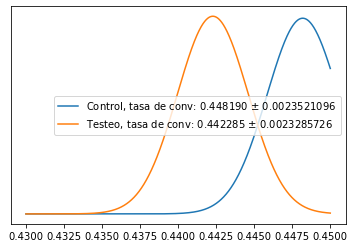

In [121]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [148]:
salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto

-0.013175098158249857

In [149]:
prob=scipy.stats.norm.sf(0.4451,beta_control.mean(),beta_control.std())
prob
#scipy.stats.norm.cdf(0.4451,beta_control.mean(),beta_control.std())

0.905545817350013

In [124]:
# testeo para retention_7
CR_ctrl_7=len(gate_30[gate_30['retention_7']==True])/len(gate_30)
CR_test_7=len(gate_40[gate_40['retention_7']==True])/len(gate_40)

f'TASAS: Control_7={CR_ctrl_7}, Test_7={CR_test_7}'


'TASAS: Control_7=0.19020134228187918, Test_7=0.18200004396667327'

In [125]:
a_C_7, b_C_7 = len(gate_30[gate_30['retention_7']==True])+1, len(gate_30)-len(gate_30[gate_30['retention_7']==True])+1
a_T_7, b_T_7 = len(gate_40[gate_40['retention_7']==True])+1, len(gate_40)-len(gate_40[gate_40['retention_7']==True])+1

beta_control_7=beta(a_C_7, b_C_7)
beta_test_7=beta(a_T_7, b_T_7)

In [126]:
beta_control_7.mean(), beta_test_7.mean()

(0.19021520289919913, 0.18201402475214878)

In [130]:
x=np.linspace(0.17, 0.20, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

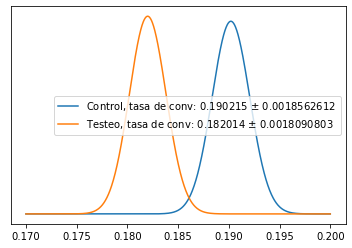

In [131]:
plot([beta_control_7, beta_test_7], ['Control', 'Testeo'])

In [147]:
salto_7=(beta_test_7.mean()-beta_control_7.mean())/beta_control.mean()

salto_7

-0.018298431022183412

In [146]:
prob_7=scipy.stats.norm.sf(0.1852,beta_control_7.mean(),beta_control_7.std())
prob_7

0.9965514946995415

In [108]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.

In [150]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un -1.32%, con una probabilidad del 90.55%'

In [151]:
'''El test_7 aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto_7*100, prob_7*100)

'El test_7 aumenta la tasa de conversion en un -1.83%, con una probabilidad del 99.66%'